# **Problem Statement:**

Online education platforms offer a wide variety of courses, and learners often rely on course ratings to make informed decisions about which courses to enroll in. However, understanding the factors that influence course ratings can be complex.

The problem is to identify the key features that significantly impact course ratings and to develop a predictive model that can accurately estimate the rating of a course based on these features. This will enable learners to make better choices and potentially help course providers to improve the quality of their offerings.


---





# **Goal**

The primary goal is to predict online course ratings using various features of the courses and user interactions. This is achieved by building a predictive model that estimates the rating of a course based on characteristics such as course title, partner, review text, skill gain, and user input.


---



user_input: Some form of unique identifier for the user giving feedback.

course_title: The title of the course being reviewed.

course_partner: The institution or organization partnering to offer the course.

course_review: The actual text of the review written by the user.

skill_gain: A rating or description of the skills gained from the course.

course_detail: A detailed description or syllabus information about the course.

Target: The goal is to predict the course rating

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step1 : Understand the data



user_input: This might contain some form of unique identifier for the user giving feedback (like a username or ID).

course_title: Likely represents the title of the course being reviewed.

course_partner: Could refer to the institution or organization partnering to offer the course.

course_review: This would hold the actual text of the review written by the user.

skill_gain: Possibly a rating or description of the skills gained from the course.

course_rating: A numerical rating given by the user for the overall quality of the course. Targetvariable

course_detail: This might contain a more detailed description or syllabus information about the course

In [ ]:
df=pd.read_csv("/content/duplicate_deleted.csv")
df

,user_input,course_title,course_partner,course_review,skill_gain,course_rating,course_detail
0,web_developement,Meta Front-End Developer,Meta,(18K reviews),"Skills you'll gain: HTML and CSS, Javascript, ...",(4.7,Beginner Â· Professional Certificate Â· 3 - 6 ...
1,web_developement,"HTML, CSS, and Javascript for Web Developers",Johns Hopkins University,(16K reviews),"Skills you'll gain: Front-End Web Development,...",(4.7,Mixed Â· Course Â· 1 - 3 Months
2,web_developement,Web Design for Everybody: Basics of Web Develo...,University of Michigan,(34K reviews),"Skills you'll gain: Front-End Web Development,...",(4.7,Beginner Â· Specialization Â· 3 - 6 Months
3,web_developement,"Python for Data Science, AI & Development",IBM,(36K reviews),"Skills you'll gain: Python Programming, Comput...",(4.6,Beginner Â· Course Â· 1 - 3 Months
4,web_developement,Introduction to Web Development,"University of California, Davis",(3.6K reviews),"Skills you'll gain: Computer Programming, Fron...",(4.7,Beginner Â· Course Â· 1 - 3 Months
...,...,...,...,...,...,...,...
50162,science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,(14K reviews),"Skills you'll gain: Computer Programming, Data...",(4.7,Beginner Â· Course Â· 1 - 3 Months
50163,science,Positive Psychology: Applications and Interven...,University of Pennsylvania,(2.1K reviews),NaN,(4.8,Beginner Â· Course Â· 1 - 4 Weeks
50164,science,International Security Management,Erasmus University Rotterdam,(1.1K reviews),"Skills you'll gain: Leadership and Management,...",(4.7,Beginner Â· Course Â· 1 - 3 Months
50165,science,Primeros pasos en el proceso de diseÃ±o de UX:...,Google,(756 reviews),"Skills you'll gain: Communication, Design and ...",(4.9,Beginner Â· Course Â· 1 - 3 Months


In [ ]:
df.shape

(50167, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_input      50167 non-null  object
 1   course_title    50167 non-null  object
 2   course_partner  50167 non-null  object
 3   course_review   43286 non-null  object
 4   skill_gain      40562 non-null  object
 5   course_rating   43286 non-null  object
 6   course_detail   50167 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [ ]:
df.sample(10)

,user_input,course_title,course_partner,course_review,skill_gain,course_rating,course_detail
10758,sales,How to create and sell templates on Canva,Coursera Project Network,NaN,"Skills you'll gain: Graphic Design, Sales",NaN,Beginner Â· Guided Project Â· Less Than 2 Hours
39380,general_health,Implant Dentistry,The University of Hong Kong,(1.5K reviews),Skills you'll gain: Planning,(4.8,Mixed Â· Course Â· 1 - 3 Months
28580,other_design_tools,From Idea to Startup,Technion - Israel Institute of Technology,(763 reviews),"Skills you'll gain: Entrepreneurship, Planning...",(4.8,Mixed Â· Course Â· 1 - 3 Months
27564,motivation,Secure Networked System with Firewall and IDS,University of Colorado System,(57 reviews),"Skills you'll gain: Computer Networking, Netwo...",(3.9,Intermediate Â· Course Â· 1 - 4 Weeks
17628,compliance,Solar Energy and Electrical System Design,University at Buffalo,(658 reviews),NaN,(4.7,Intermediate Â· Course Â· 1 - 3 Months
43686,vocal,MBA Essentials,University of Glasgow,(29 reviews),Skills you'll gain: Marketing,(4.6,Intermediate Â· Course Â· 1 - 4 Weeks
45998,online_education,Children's Human Rights - An Interdisciplinary...,University of Geneva,(2.1K reviews),NaN,(4.7,Beginner Â· Course Â· 1 - 3 Months
23390,microsoft,Create Informative Presentations with Microsof...,Coursera Project Network,(27 reviews),"Skills you'll gain: Communication, Data Visual...",(4.0,Intermediate Â· Guided Project Â· Less Than 2 ...
43929,vocal,Paleontology: Early Vertebrate Evolution,University of Alberta,(1.1K reviews),NaN,(4.8,Mixed Â· Course Â· 1 - 4 Weeks
19566,it_certifications,Software Engineering,The Hong Kong University of Science and Techno...,(294 reviews),"Skills you'll gain: Software Engineering, Syst...",(4.6,Intermediate Â· Specialization Â· 3 - 6 Months


# Step2 : Data Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Checking null values
null_values=df.isnull().sum()
null_values

,0
user_input,0
course_title,0
course_partner,0
course_review,6881
skill_gain,9605
course_rating,6881
course_detail,0


In [ ]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_input      50167 non-null  object
 1   course_title    50167 non-null  object
 2   course_partner  50167 non-null  object
 3   course_review   43286 non-null  object
 4   skill_gain      40562 non-null  object
 5   course_rating   43286 non-null  object
 6   course_detail   50167 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [ ]:
# Replace unwanted characters and patterns in the 'course_review' column
df['course_review']=df['course_review'].str.replace("(",'') # Remove parentheses
df['course_review']=df['course_review'].str.replace(")","") # Remove parentheses
df['course_review']=df['course_review'].str.replace("reviews","") # Remove "reviews"
df['course_review']=df['course_review'].str.replace("course_review",'nan') # Replace with 'nan'
df['course_review']=df['course_review'].str.replace("K","000") # Replace 'K' with '000'


# Convert the cleaned strings to float
df['course_review']=df['course_review'].astype(float)

In [ ]:
df['course_rating']=df['course_rating'].str.replace("(",'')
df['course_rating']=df['course_rating'].str.replace('course_rating',"nan")
df['course_rating']=df['course_rating'].astype(float)

In [ ]:

# for i in df['course_review']:
#   print(i)
#   # if i in "course_review":
#   #   print(i)

In [ ]:
# Using a for loop to drop rows with None values in 'course_review'
# for index in df.index:
#     if pd.isnull(df.loc[index, 'course_review']):
#         df = df.drop(index)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50167 entries, 0 to 50166
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_input      50167 non-null  object 
 1   course_title    50167 non-null  object 
 2   course_partner  50167 non-null  object 
 3   course_review   43285 non-null  float64
 4   skill_gain      40562 non-null  object 
 5   course_rating   43285 non-null  float64
 6   course_detail   50167 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.7+ MB


In [ ]:
# df['course_review'].fillna(df['course_review'].mode(),inplace=True)
# df.fillna({'course_review':df['course_review'].mode()},inplace=True)

In [ ]:
# Checking mean and mode
print(df['course_rating'].mode())
print(df['course_rating'].median())

0    4.7
Name: course_rating, dtype: float64
4.7


In [ ]:
# Create a dictionary for filling NaN values
fill_values = {
    'course_review': df['course_review'].mode()[0],
    'course_rating': df['course_rating'].mode()[0],
    'skill_gain': df['skill_gain'].mode()[0]
}

# Fill NaN values using the dictionary
df.fillna(fill_values, inplace=True)

In [ ]:
df.isnull().sum()

,0
user_input,0
course_title,0
course_partner,0
course_review,0
skill_gain,0
course_rating,0
course_detail,0


# Step3 : Descriptive Statistics

In [ ]:
df.describe()

,course_review,course_rating
count,50167.000000,50167.000000
mean,2256.140919,4.639957
std,12350.892679,0.236459
min,1.100000,1.400000
25%,2.700000,4.600000
50%,42.000000,4.700000
75%,325.000000,4.800000
max,271000.000000,5.000000


In [ ]:
df.describe(include='object')

,user_input,course_title,course_partner,skill_gain,course_detail
count,50167,50167,50167,50167,50167
unique,121,10723,323,5985,43
top,science,Google IT Support,Coursera Project Network,Skills you'll gain: Leadership and Management,Beginner Â· Course Â· 1 - 3 Months
freq,1000,46,4631,10148,9778


# Step 4 : Data visualization

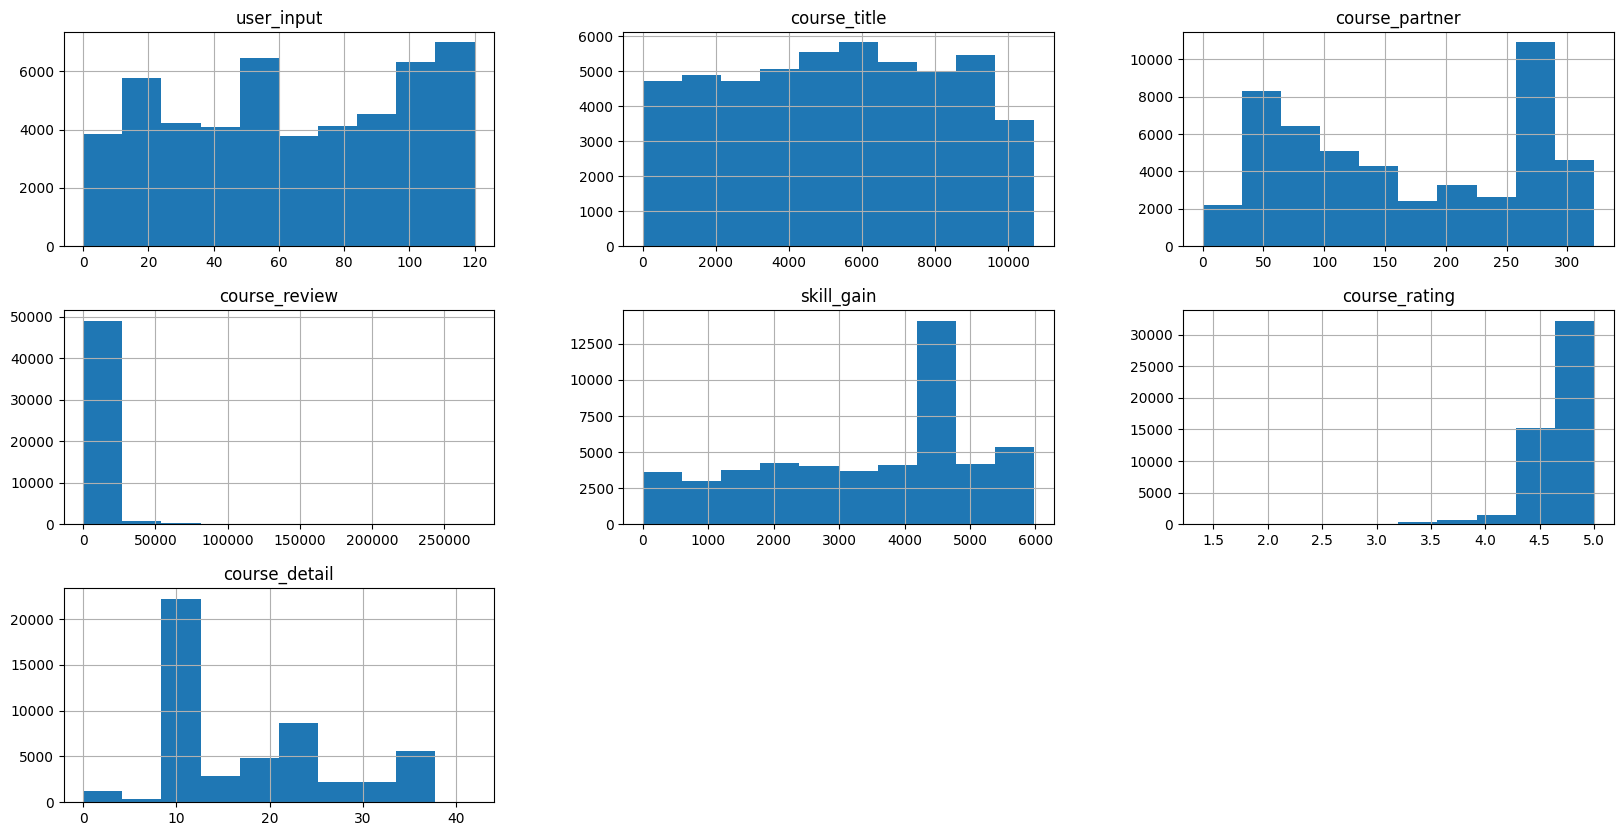

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(20,10))
plt.show()

In [ ]:
df

,user_input,course_title,course_partner,course_review,skill_gain,course_rating,course_detail
0,web_developement,Meta Front-End Developer,Meta,18000.0,"Skills you'll gain: HTML and CSS, Javascript, ...",4.7,Beginner Â· Professional Certificate Â· 3 - 6 ...
1,web_developement,"HTML, CSS, and Javascript for Web Developers",Johns Hopkins University,16000.0,"Skills you'll gain: Front-End Web Development,...",4.7,Mixed Â· Course Â· 1 - 3 Months
2,web_developement,Web Design for Everybody: Basics of Web Develo...,University of Michigan,34000.0,"Skills you'll gain: Front-End Web Development,...",4.7,Beginner Â· Specialization Â· 3 - 6 Months
3,web_developement,"Python for Data Science, AI & Development",IBM,36000.0,"Skills you'll gain: Python Programming, Comput...",4.6,Beginner Â· Course Â· 1 - 3 Months
4,web_developement,Introduction to Web Development,"University of California, Davis",3.6,"Skills you'll gain: Computer Programming, Fron...",4.7,Beginner Â· Course Â· 1 - 3 Months
...,...,...,...,...,...,...,...
50162,science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,14000.0,"Skills you'll gain: Computer Programming, Data...",4.7,Beginner Â· Course Â· 1 - 3 Months
50163,science,Positive Psychology: Applications and Interven...,University of Pennsylvania,2.1,Skills you'll gain: Leadership and Management,4.8,Beginner Â· Course Â· 1 - 4 Weeks
50164,science,International Security Management,Erasmus University Rotterdam,1.1,"Skills you'll gain: Leadership and Management,...",4.7,Beginner Â· Course Â· 1 - 3 Months
50165,science,Primeros pasos en el proceso de diseÃ±o de UX:...,Google,756.0,"Skills you'll gain: Communication, Design and ...",4.9,Beginner Â· Course Â· 1 - 3 Months


# Step 5 : Correlation Analysis

In [ ]:
# object value into numerical using labelencoder.fit_transform
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df['user_input']=labelencoder.fit_transform(df['user_input'])
df['course_detail']=labelencoder.fit_transform(df['course_detail'])
df['course_title']=labelencoder.fit_transform(df['course_title'])
df['course_partner']=labelencoder.fit_transform(df['course_partner'])
df['skill_gain']=labelencoder.fit_transform(df['skill_gain'])
df['course_detail']=labelencoder.fit_transform(df['course_detail'])

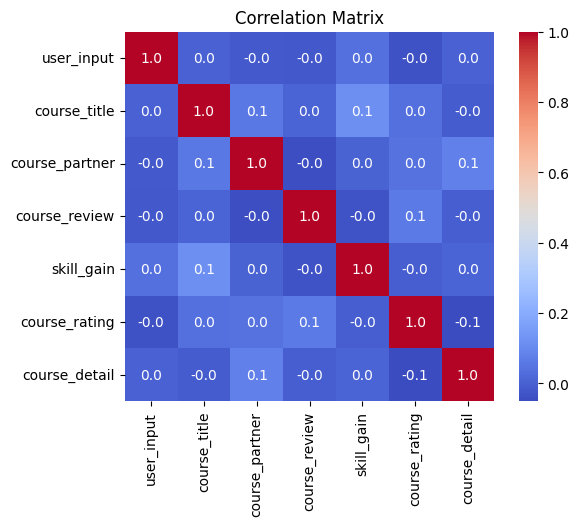

In [ ]:
# Correlation Heatmap
Corr_matrix=df.corr()

sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
Corr_matrix

,user_input,course_title,course_partner,course_review,skill_gain,course_rating,course_detail
user_input,1.000000,0.001329,-0.014433,-0.019228,0.039385,-0.038212,0.002459
course_title,0.001329,1.000000,0.058935,0.009279,0.113830,0.037306,-0.011458
course_partner,-0.014433,0.058935,1.000000,-0.045474,0.005925,0.039883,0.077181
course_review,-0.019228,0.009279,-0.045474,1.000000,-0.030087,0.063582,-0.008546
skill_gain,0.039385,0.113830,0.005925,-0.030087,1.000000,-0.006712,0.008295
course_rating,-0.038212,0.037306,0.039883,0.063582,-0.006712,1.000000,-0.050595
course_detail,0.002459,-0.011458,0.077181,-0.008546,0.008295,-0.050595,1.000000


# Step 6 : outlier Detection

,0
user_input,"Axes(0.125,0.747241;0.227941x0.132759)"
course_title,"Axes(0.398529,0.747241;0.227941x0.132759)"
course_partner,"Axes(0.672059,0.747241;0.227941x0.132759)"
course_review,"Axes(0.125,0.587931;0.227941x0.132759)"
skill_gain,"Axes(0.398529,0.587931;0.227941x0.132759)"
course_rating,"Axes(0.672059,0.587931;0.227941x0.132759)"
course_detail,"Axes(0.125,0.428621;0.227941x0.132759)"


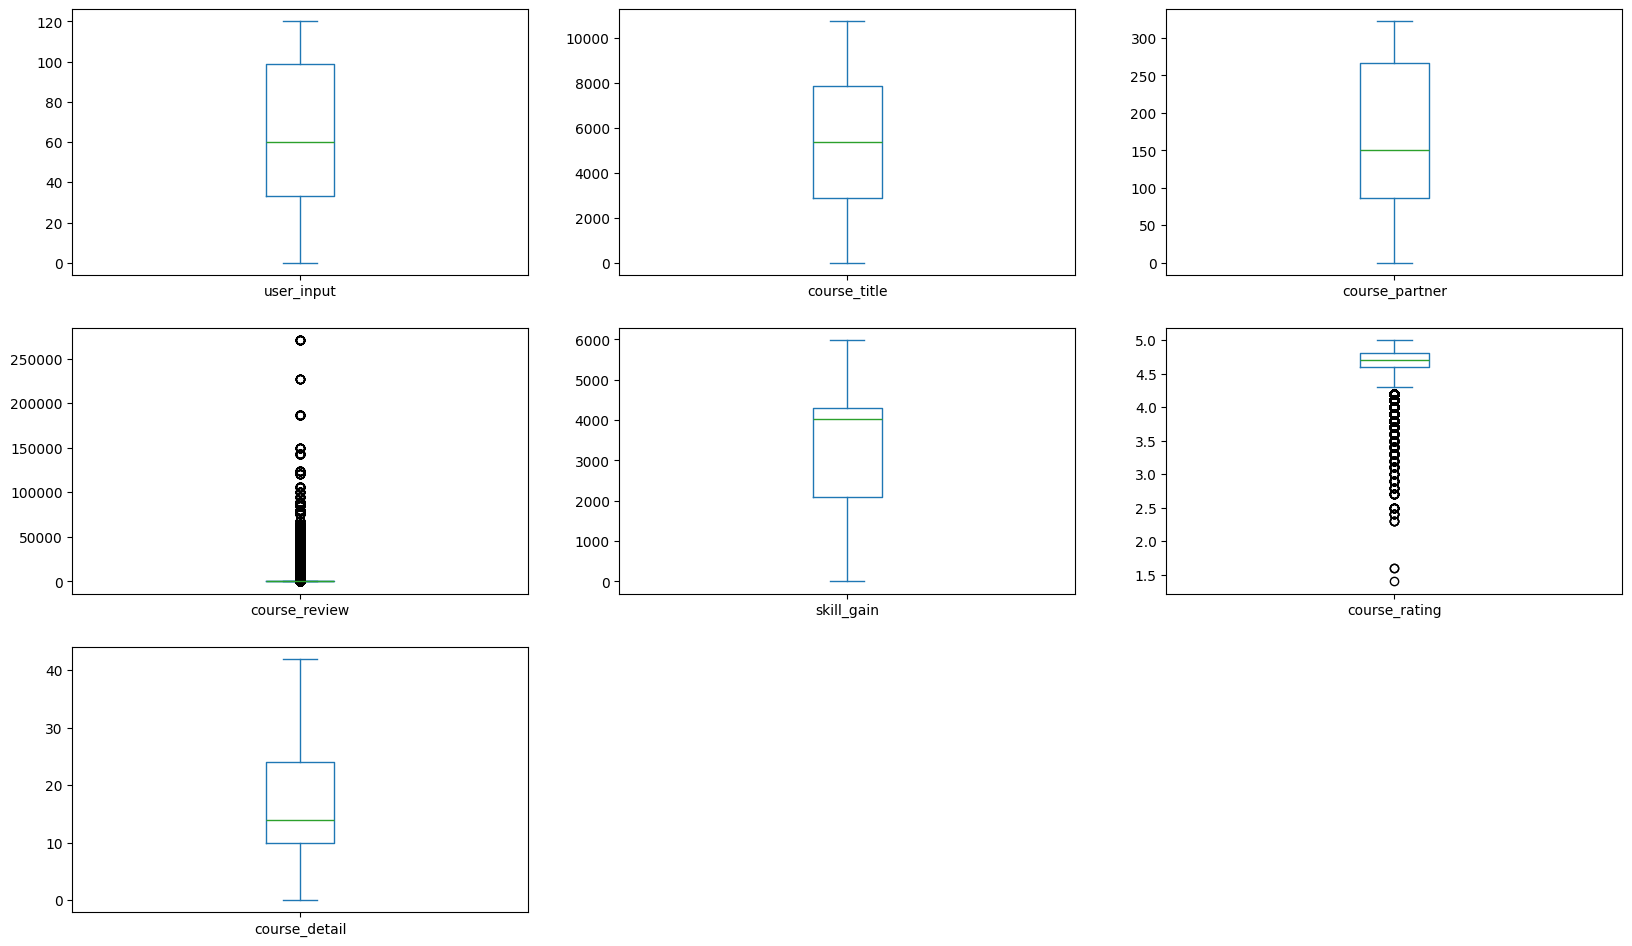

In [ ]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

In [ ]:
# copying the data set into another variable
df1=df.copy()

In [ ]:
# Removing outliers using IQR method
x=['user_input','course_title','course_partner','course_review','skill_gain','course_detail']
for i in x:
  data=df1[i]
  Q1=np.quantile(data,0.25)
  Q2=np.quantile(data,0.50)
  Q3=np.quantile(data,0.75)
  iqr=Q3-Q1
  lower=Q1-(1.5*iqr)
  upper=Q3+(1.5*iqr)
  outliers=[j for j in data if j<lower or j>upper]
  print(len(outliers))
  df1=df1[(df1[i]>=lower)&(df1[i]<=upper)]

0
0
0
5437
0
0


In [ ]:
# df1.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44730 entries, 4 to 50165
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_input      44730 non-null  int64  
 1   course_title    44730 non-null  int64  
 2   course_partner  44730 non-null  int64  
 3   course_review   44730 non-null  float64
 4   skill_gain      44730 non-null  int64  
 5   course_rating   44730 non-null  float64
 6   course_detail   44730 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.7 MB


# Step 7 : Feature Engineering

In [ ]:
import numpy as np
df1.info()
df1.skew()
x=df1[['user_input','course_title','course_partner','course_review','skill_gain','course_rating',	'course_detail']]
for i in x:
  df1[i]=np.log1p(df1[i])
  print(df1[i])

<class 'pandas.core.frame.DataFrame'>
Index: 44730 entries, 4 to 50165
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_input      44730 non-null  int64  
 1   course_title    44730 non-null  int64  
 2   course_partner  44730 non-null  int64  
 3   course_review   44730 non-null  float64
 4   skill_gain      44730 non-null  int64  
 5   course_rating   44730 non-null  float64
 6   course_detail   44730 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.7 MB
4        4.795791
5        4.795791
7        4.795791
9        4.795791
10       4.795791
           ...   
50160    4.624973
50161    4.624973
50163    4.624973
50164    4.624973
50165    4.624973
Name: user_input, Length: 44730, dtype: float64
4        8.723394
5        7.069874
7        7.082549
9        9.007612
10       9.203114
           ...   
50160    9.032768
50161    9.198571
50163    8.965335
50164    8.628735
50165    8.98644

# Step 8 : Dimensionality Reduction

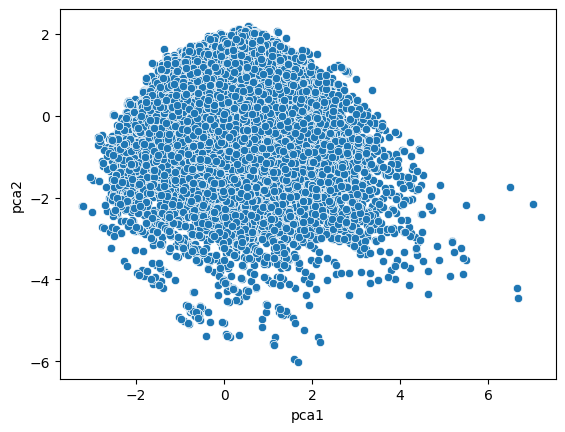

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['user_input','course_title','course_partner','course_review','skill_gain','course_rating',	'course_detail']
X = StandardScaler().fit_transform(df1[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df1['pca1'] = pca_result[:, 0]
df1['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', data=df1)
plt.show()

# Step 9 : Data scaling

In [ ]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=StandardScaler()
min=MinMaxScaler()
df1[['course_detail','course_review','skill_gain','course_rating']]=sc.fit_transform(df1[['course_detail','course_review','skill_gain','course_rating']])


In [ ]:
df1

,user_input,course_title,course_partner,course_review,skill_gain,course_rating,course_detail
4,4.795791,8.723394,5.583496,-0.854008,-0.204143,0.272307,-0.771973
5,4.795791,7.069874,3.970292,-0.833210,-0.122042,-0.877652,-2.309381
7,4.795791,7.082549,3.970292,0.226783,0.443323,-2.093357,0.894564
9,4.795791,9.007612,5.010635,-0.833210,0.491657,0.272307,-0.771973
10,4.795791,9.203114,3.970292,-1.214465,-0.296441,-0.487383,-0.331763
...,...,...,...,...,...,...,...
50160,4.624973,9.032768,5.602119,1.584617,0.502829,0.642213,-0.771973
50161,4.624973,9.198571,5.278115,0.751887,-0.541511,0.272307,-0.771973
50163,4.624973,8.965335,5.676754,-1.046872,0.502829,0.642213,-0.612056
50164,4.624973,8.628735,4.290459,-1.237199,0.588433,0.272307,-0.771973


# Step 10 : Intal Modeling and Hypothesis Testing  

In [ ]:
# Modeling and Testing the dataset
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
model =DecisionTreeRegressor()
x = df1[['user_input','course_title','course_partner','course_review','skill_gain','course_detail','pca1','pca2']]
y = df1["course_rating"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)   #spliting the data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# fiting the model
r2=r2_score(y_test,y_pred)
print(f'Baseline model r2score: {r2}')
mae=mean_absolute_error(y_test,y_pred)
print(f'Baseline model mae: {mae}')
mse=mean_squared_error(y_test,y_pred)
print(f'Baseline model mse: {mse}')
rmse=sqrt(mse)
print(f'Baseline model rmse: {rmse}')
perer=[((np.abs(y_test-y_pred))/y_test)*100]
print(f'Baseline model percentage error: {np.mean(perer)}')

Baseline model r2score: 0.8605832315952475
Baseline model mae: 0.1455191554535858
Baseline model mse: 0.13763696996214542
Baseline model rmse: 0.37099456864237973
Baseline model percentage error: -13.089750153424628


# Step 11 : Documentation and Reeporting

In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
"Course Rating.": df.corr()["course_rating"].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling

# final_df = df[[]]

EDA Summary:
Dataset Shape: (50167, 7)
Missing Values: 0
Course Rating.: course_rating     1.000000
course_review     0.063582
course_partner    0.039883
course_title      0.037306
skill_gain       -0.006712
user_input       -0.038212
course_detail    -0.050595
Name: course_rating, dtype: float64



# Project: Course Rating Prediction

# **Objective:** To explore factors influencing course ratings and build a predictive model.
# **Data Source:** The dataset 'duplicate_deleted.csv' containing online course reviews.
# **Methodology:** Data cleaning, EDA, feature engineering, modeling, and evaluation using DecisionTreeRegressor.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


# Data Understanding and Cleaning

# **Data Description:** The dataset contains user input, course title, partner, review text, skill gain, and course ratings (target variable).
# **Cleaning Steps:**
#  Removed rows with null values.
#  Removed unwanted characters and patterns in the 'course_review' column.
# Converted columns to appropriate data types.


# Load the data
***df = pd.read_csv("/content/duplicate_deleted.csv")***

# Data cleaning... [your cleaning code]


### Exploratory Data Analysis (EDA)

# **Descriptive Statistics:**
#  [Include summary statistics and observations about the data]

# **Data Visualization:**
#  [Include visualizations like histograms, box plots, and correlation matrices]

#  [Explain insights drawn from the visualizations]


# Descriptive statistics
df.describe()

# Data visualization... [your visualization code]


# **Feature Engineering**

# **New Features:**
#  Applied PCA for dimensionality reduction, creating 'pca1' and 'pca2'.
#  Applied log transformation to handle skewed data in specific columns.

# **Feature Selection:**
#  [Mention any features dropped or selected and why]


# Feature engineering... [your feature engineering code]


 **Model** Building & Evaluation

# **Model Selection:** DecisionTreeRegressor chosen for its effectiveness in feature selection.
# **Model Parameters:** [Specify hyperparameters if any]
# **Evaluation Metrics:** RMSE, MSE, MAE, R-squared, and percentage error.


# Model building and evaluation... [your modeling and evaluation code]


## Conclusions and Recommendations

# **Key Insights:**
#  [Summarize key insights from the analysis]

# **Limitations:**
#  [Discuss limitations of the analysis]

# **Future Directions:**
#  [Suggest areas for further exploration]

